<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و تحلیل داده‌های متنی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این پروژه، فرآیندهای پیش‌پردازش بر روی مجموعه‌ای از متون خبری انجام می‌گیرد. این مراحل شامل:
<br>
۱- بارگذاری و توزیع داده‌ها
<br>
۲- پیش‌پردازش متن‌ها
<br>
۳- توکنایز کردن، حذف کلمات توقف، برچسب‌گذاری اجزای کلام، ریشه‌یابی و لمات‌سازی
<br>
۴- ذخیره‌ی خروجی‌های تولیدشده در فایل‌های جداگانه
</font>
</p>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام پروژه را وارد می‌کنیم.
</font>
</p>

In [233]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری داده‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده‌های مربوط به دسته‌بندی اخبار از فایل CSV بارگذاری شده و پنج سطر اول آن بررسی می‌شود.
</font>
</p>

In [234]:
# TODO
df = pd.read_csv('../Data/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
توزیع دسته‌های خبری
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نموداری برای نمایش تعداد نمونه‌های موجود در هر دسته خبری ترسیم می‌شود.
</font>
</p>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4512\3073674488.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='viridis')


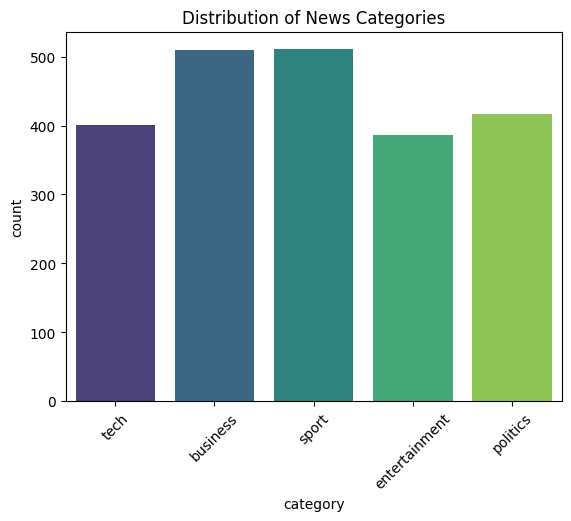

In [235]:
sns.countplot(data=df, x='category', palette='viridis')
plt.title("Distribution of News Categories")
plt.xticks(rotation=45)
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش متن
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله متن‌ها شامل موارد زیر پیش‌پردازش می‌شوند:
<br>
۱- تبدیل به حروف کوچک
<br>
۲- حذف علائم نگارشی
<br>
۳- توکنایز کردن
<br>
۴- حذف کلمات توقف
<br>
۵- انجام لم یابی
</font>
</p>

In [236]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# TODO
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    full_text = ' '.join(tokens)
    return full_text

df['preprocessed_text'] = df['text'].apply(preprocess_text)

df[['text', 'preprocessed_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,preprocessed_text
0,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مصورسازی ابر کلمات
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله برای هر دسته بندی از موضوع ها، ابر کلمات مربوط به آن دسته را مصورسازی میکنیم
</font>
</p>

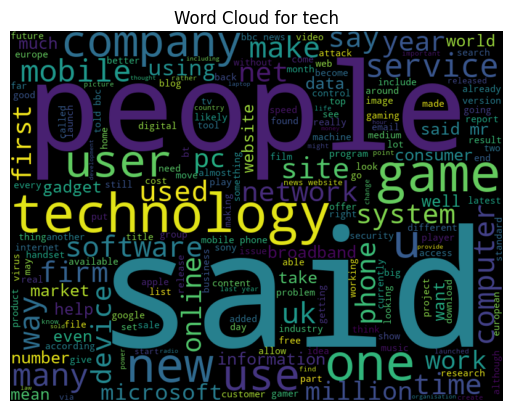

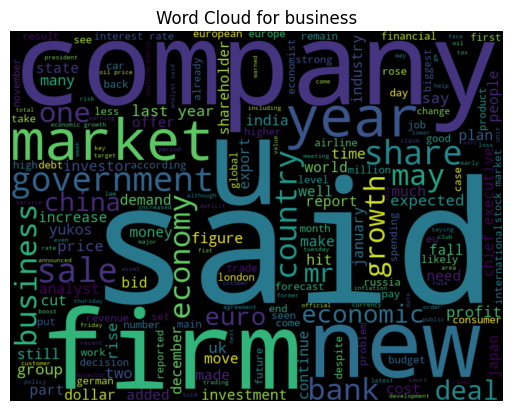

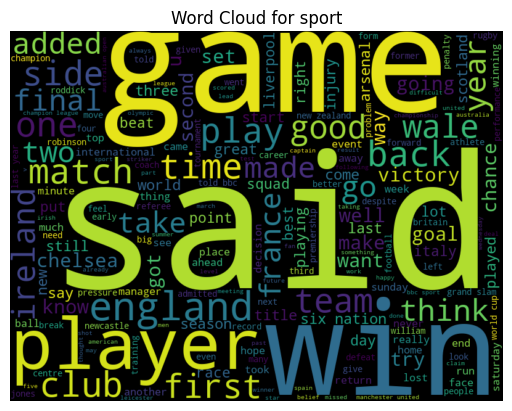

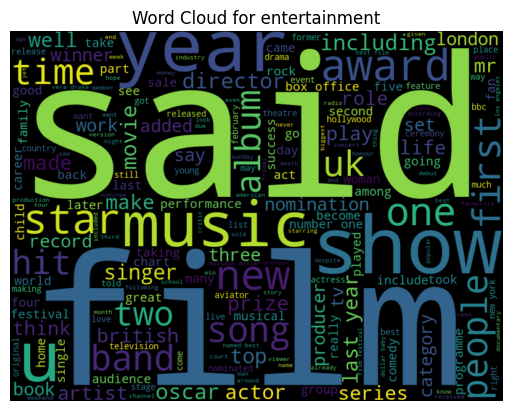

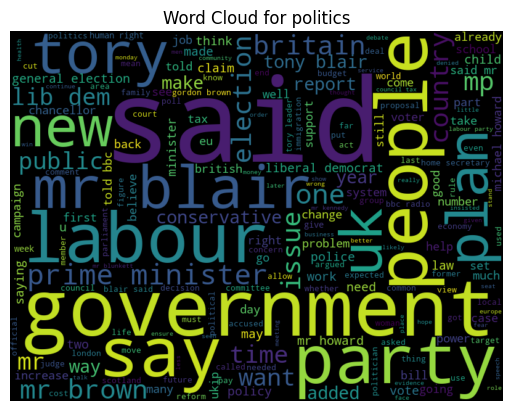

In [237]:
from wordcloud import WordCloud

for category in df['category'].unique():
    category_text = " ".join(df[df['category'] == category]['preprocessed_text'])

    # TODO
    wordcloud = WordCloud(width=800, height=600, background_color='black').generate(category_text)
    plt.imshow(wordcloud, interpolation='bilinear')

    plt.title(f"Word Cloud for {category}")
    plt.axis('off')
    plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل فراوانی کلمات
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، تعداد تکرار هر کلمه در متن‌های پیش‌پردازش‌شده شمارش می‌شود. سپس بیست کلمه پرتکرار استخراج و به‌صورت نمودار میله‌ای نمایش داده می‌شوند.
</font>
</p>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4512\2161838351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_df, x='Frequency', y='Word', palette='plasma')


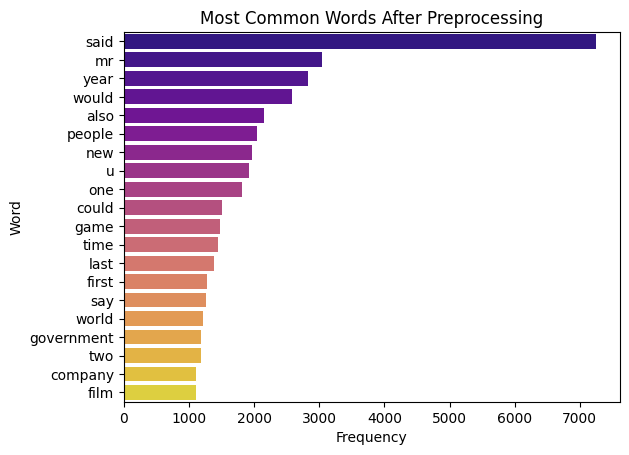

In [238]:
all_words = [word for text in df['preprocessed_text'] for word in text.split()]

word_freq = Counter(all_words)

most_common_words = word_freq.most_common(20)
common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

sns.barplot(data=common_df, x='Frequency', y='Word', palette='plasma')
plt.title("Most Common Words After Preprocessing")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بردارسازی با استفاده از TF-IDF
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بردارسازی متن‌های پیش‌پردازش‌شده از روش TF-IDF استفاده می‌کنیم. این روش به هر کلمه وزنی اختصاص می‌دهد که نشان‌دهنده اهمیت آن در متن است. خروجی این بخش یک ماتریس پراکنده است که هر سطر نشان‌دهنده یک سند و هر ستون نمایانگر ویژگی یک کلمه است.
</font>
</p>


In [239]:
# TODO

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

tfidf_matrix.shape

(2225, 29599)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمایش ویژگی‌های برتر TF-IDF
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، مقادیر TF-IDF برای اولین سند نمایش داده می‌شود. ویژگی‌های برتر آن براساس امتیاز TF-IDF مرتب شده و نمودار میله‌ای برای نمایش آن‌ها ترسیم می‌شود.
</font>
</p>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4512\459482898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_sample, x='TF-IDF Score', y='Word', palette='cividis')


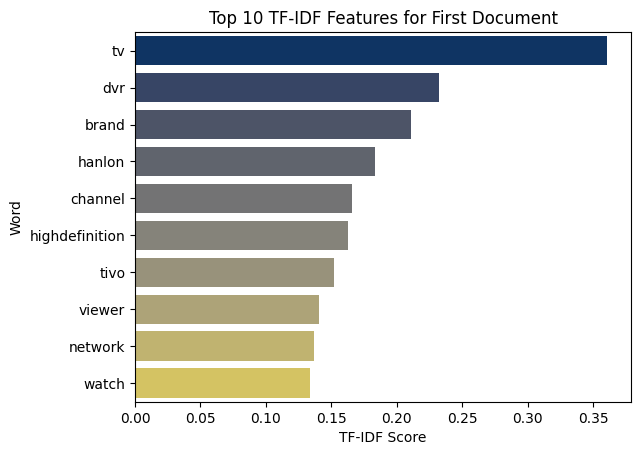

In [240]:
tfidf_sample = pd.DataFrame(tfidf_matrix[0].toarray().T, columns=["TF-IDF Score"])
tfidf_sample['Word'] = tfidf_vectorizer.get_feature_names_out()
tfidf_sample = tfidf_sample.sort_values(by="TF-IDF Score", ascending=False).head(10)

sns.barplot(data=tfidf_sample, x='TF-IDF Score', y='Word', palette='cividis')
plt.title("Top 10 TF-IDF Features for First Document")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رمزگذاری دسته‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای استفاده از دسته‌های متنی در مدل‌های یادگیری ماشین، باید آن‌ها به مقادیر عددی تبدیل کنیم. در این بخش، از <code>LabelEncoder</code> برای رمزگذاری دسته‌ها استفاده شده است.
</font>
</p>


In [241]:
label_encoder = LabelEncoder()

# TODO
df['category_encoded'] = label_encoder.fit_transform(df['category'])

df[['category', 'category_encoded']].drop_duplicates().sort_values('category_encoded')

,category,category_encoded
1,business,0
4,entertainment,1
5,politics,2
2,sport,3
0,tech,4


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تقسیم داده به مجموعه‌های آموزش و آزمایش
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای ارزیابی مدل، داده‌ها به دو مجموعه آموزش و آزمایش تقسیم می‌شوند. داده‌های آموزش برای یادگیری مدل و داده‌های آزمایش برای بررسی دقت آن استفاده می‌شوند.
</font>
</p>


In [242]:
X = tfidf_matrix
y = df['category_encoded']

# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1780, 29599), (445, 29599))

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، مدل <code>RandomForestClassifier</code> بر روی داده‌های آموزشی آموزش داده می‌شود. این مدل به دلیل توانایی بالا در یادگیری الگوهای پیچیده و تنظیمات خودکار ویژگی‌ها، انتخاب شده است.
</font>
</p>


In [244]:
classifier = SVC()

classifier.fit(X_train, y_train)

SVC()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ارزیابی مدل
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
عملکرد مدل با استفاده از معیارهای ارزیابی مختلف از جمله گزارش طبقه‌بندی، ماتریس آشفتگی و دقت کلی مورد بررسی قرار می‌گیرد. نتایج مدل به کمک نمودارها و متریک‌ها تحلیل می‌شوند.
</font>
</p>



Classification Report:
               precision    recall  f1-score   support

     business       0.93      0.95      0.94       101
entertainment       0.99      0.98      0.98        81
     politics       0.94      0.95      0.95        83
        sport       0.97      1.00      0.98        98
         tech       1.00      0.94      0.97        82

     accuracy                           0.96       445
    macro avg       0.97      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



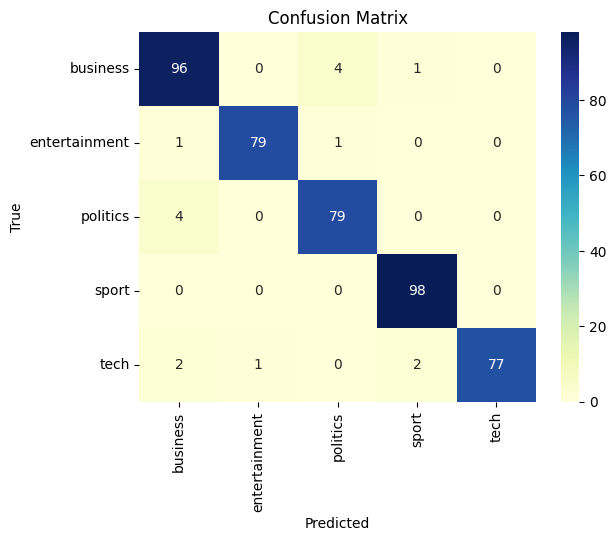

Overall Accuracy: 0.96


In [245]:
# Predict on the test data
y_pred = classifier.predict(X_test)

# Classification report to evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix to visualize model performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")


In [246]:
df.head()

,category,text,preprocessed_text,category_encoded
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ذخیره‌سازی پیش‌بینی‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، نتایج پیش‌بینی‌شده مدل به همراه متن‌های پیش‌پردازش‌شده در یک فایل CSV ذخیره می‌شود. این فایل می‌تواند برای تحلیل بیشتر و مقایسه با مقادیر واقعی استفاده شود.
</font>
</p>


In [ ]:
test_indices = y_test.index
output_df = pd.DataFrame({
    'index': test_indices,
    'preprocessed_text': df.loc[test_indices, 'preprocessed_text'],
    'predicted_category': label_encoder.inverse_transform(y_pred)
})

output_df.to_csv('predictions.csv', index=False)
output_df.head()

In [ ]:
import zipfile

files_to_zip = ['Project.ipynb', 'predictions.csv']
zip_filename = 'submission.zip'

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in files_to_zip:
        try:
            zipf.write(file)
            print(f"Added {file} to {zip_filename}")
        except FileNotFoundError:
            print(f"Warning: {file} not found. Skipping.")

print(f"Files have been zipped into {zip_filename}, you can now submit it!")
